## The usual drill of importing libraries

In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


## Study The Data

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.shape

(271360, 8)

In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users.shape

(278858, 3)

In [23]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

## Outlier Detection

<AxesSubplot:xlabel='Age'>

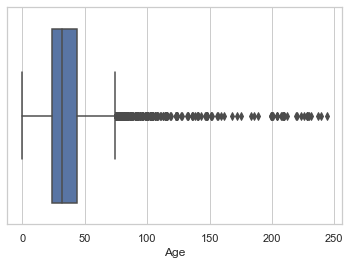

In [28]:
sns.set(style="whitegrid")
sns.boxplot(x='Age',data=users)

In [32]:
q3=users.Age.quantile(0.75)
print(1.5*q3)

66.0


In [39]:
users[users['Age']>66.0].count()

User-ID     3542
Location    3542
Age         3542
dtype: int64

In [40]:
users[users['Age']>66.0].head()

,User-ID,Location,Age
220,221,"palm beach, florida, usa",79.0
482,483,"shelton, washington, usa",72.0
539,540,"watertown, south dakota, usa",67.0
689,690,"lake oswego, oregon, usa",80.0
729,730,"albuquerque, new mexico,",69.0


##  Should I remove the outliers ?

Basically there are users who specify thier ages higher than it actually is(don't know why like greater than 100) , it is better to remove the data of users of Age greater than 100 , because it would not be genuine Data , but since i am going for a basic approach towards explaining Collaborative Filtering i am going to consider only **User Similarity** on the basis of thier average rating. 

## Should I be concerned with the NULL values in Age Column?

For this specific problem , the answer would be **yes** because you pobably want to match the users of same age group.But as i already mentioned i am going after matching users with only rating based criteria , i am skipping that part. 

<AxesSubplot:>

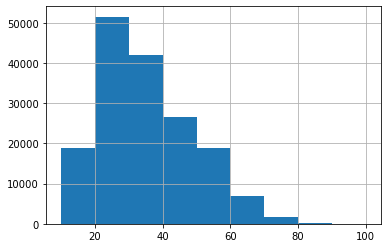

In [17]:
users.Age.hist(bins=[10,20,30,40,50,60,70,80,90,100])

In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
ratings.shape

(1149780, 3)

In [10]:
ratings['User-ID'].nunique()

105283

In [11]:
ratings.rename(columns={'Book-Rating':'rating'},inplace=True)

In [12]:
ratings.head()

,User-ID,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

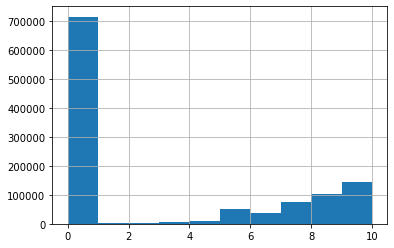

In [14]:
ratings.rating.hist(bins=10)

In [65]:
k=ratings['User-ID'].value_counts()

In [81]:
k

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: User-ID, Length: 105283, dtype: int64

In [80]:
k.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: User-ID, dtype: float64

In [105]:
user_count = pd.DataFrame(ratings.groupby('User-ID')['rating'].count())
user_count.size

105283

In [134]:
user_count.head()
user_count['rating'].max()

13602

In [139]:
user_count[user_count['rating']>500]

,rating
User-ID,
3363,901
3757,605
6251,892
6575,814
7346,1007
...,...
274004,528
274061,1038
274308,1493


In [135]:
k1=user_count[(user_count['rating']>1) & (user_count['rating']<100)].rating.count()
k2=user_count[(user_count['rating']>100) & (user_count['rating']<200)].rating.count()
k3=user_count[(user_count['rating']>200) & (user_count['rating']<500)].rating.count()
k4=user_count[(user_count['rating']>500)].rating.count()

In [136]:
x=np.array([k1,k2,k3,k4])
y=np.array(['a','b','c','d'])

In [137]:
print(k1,k2,k3,k4)

44270 920 612 287


<BarContainer object of 4 artists>

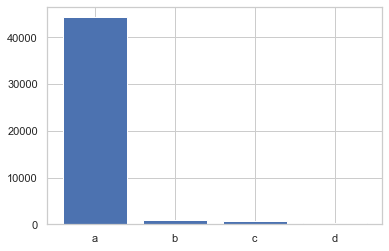

In [138]:
plt.bar(y,x)